In [5]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from random import shuffle
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [6]:
loadedModel=load_model("DenseNet-Binary.h5")

In [7]:
train_datagen = ImageDataGenerator(
      samplewise_center=True,
      samplewise_std_normalization= True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')



test_generator =train_datagen.flow_from_directory(
     "input/datafinal/test",
     batch_size= 50,
     shuffle=shuffle,
     target_size=(300, 300)

)

Found 480 images belonging to 2 classes.


In [8]:
loadedModel.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])
loadedModel.evaluate(test_generator)

10/10 [==============================] - 37s 4s/step - loss: 0.1405 - accuracy: 0.9917


[0.14048554003238678, 0.9916666746139526]

In [9]:
pred=loadedModel.predict(test_generator)

In [12]:
y_test=[]
for i in range(10):
    y_test.extend(test_generator.__getitem__(i)[1])

In [13]:
y_test=np.argmax(y_test,axis=1)
pred= np.argmax(pred,axis=1)

In [14]:
import collections

collections.Counter(y_test)

Counter({0: 130, 1: 350})

[[ 33 103]
 [ 97 247]]


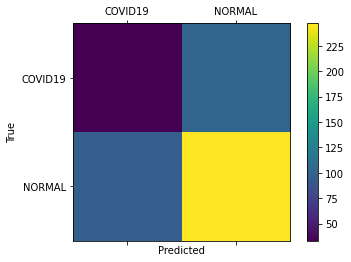

In [15]:
labels = [ "COVID19",'NORMAL','PNEUMONIA']
cm=confusion_matrix(pred,y_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
#plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()